In [3]:
import pandas as pd 
from sklearn.metrics import classification_report # sınıflandırma işleminin performansını belirlemek için
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # metin verileri üzerinde işlem yapan sınıflandırıcı
from sklearn.feature_extraction.text import TfidfVectorizer # metin verilerini sayısallaştırmak için 
from sklearn.pipeline import Pipeline # modelleme adımını bir araya getirere organize etmek için
from sklearn.feature_extraction.text import TfidfTransformer # TfidfVectorizer in oluşturduğu TF-IDF temsillerini dönüştürür
from sklearn.metrics import accuracy_score, confusion_matrix # sınıflandırma modelinin performansını belirlemek için
from sklearn.linear_model import SGDClassifier # büyük ölçekli verileri sınıflandırmak için
import matplotlib.pyplot as plt

df = pd.read_csv("fake_or_real_news.csv")

In [4]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
df['title'] = df['title'].str.lower()

In [6]:
title = df['title']
title2 = pd.DataFrame(title)
title2

,title
0,you can smell hillary’s fear
1,watch the exact moment paul ryan committed pol...
2,kerry to go to paris in gesture of sympathy
3,bernie supporters on twitter erupt in anger ag...
4,the battle of new york: why this primary matters
...,...
6330,state department says it can't find emails fro...
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332,anti-trump protesters are tools of the oligarc...
6333,"in ethiopia, obama seeks progress on peace, se..."


In [7]:
df['text'] = df['text'].str.lower()
text = df['text']
text2 = pd.DataFrame(text)
text2

,text
0,"daniel greenfield, a shillman journalism fello..."
1,google pinterest digg linkedin reddit stumbleu...
2,u.s. secretary of state john f. kerry said mon...
3,"— kaydee king (@kaydeeking) november 9, 2016 t..."
4,it's primary day in new york and front-runners...
...,...
6330,the state department told the republican natio...
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332,anti-trump protesters are tools of the oligar...
6333,"addis ababa, ethiopia —president obama convene..."


In [8]:
df['label'] = df['label'].str.lower()
label = df['label']
label2 =pd.DataFrame(label)
label2

,label
0,fake
1,fake
2,real
3,fake
4,real
...,...
6330,real
6331,fake
6332,fake
6333,real


In [9]:
sonuc = pd.concat([title2,text2,label2],axis=1)
sonuc

,title,text,label
0,you can smell hillary’s fear,"daniel greenfield, a shillman journalism fello...",fake
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake
2,kerry to go to paris in gesture of sympathy,u.s. secretary of state john f. kerry said mon...,real
3,bernie supporters on twitter erupt in anger ag...,"— kaydee king (@kaydeeking) november 9, 2016 t...",fake
4,the battle of new york: why this primary matters,it's primary day in new york and front-runners...,real
...,...,...,...
6330,state department says it can't find emails fro...,the state department told the republican natio...,real
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,fake
6332,anti-trump protesters are tools of the oligarc...,anti-trump protesters are tools of the oligar...,fake
6333,"in ethiopia, obama seeks progress on peace, se...","addis ababa, ethiopia —president obama convene...",real


In [10]:
import pandas as pd
import re


# Temizleme fonksiyonu tanımla
def temizle(text):
    # Sadece harfleri al
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Tüm metin sütunlarına temizleme fonksiyonunu uygula
for column in sonuc.columns:
    if sonuc[column].dtype == 'object':  # Sadece metin sütunlarını işle
        sonuc[column] = sonuc[column].apply(temizle)

# Temizlenmiş veriyi başka bir dosyaya yaz
sonuc.to_csv('temizlenmis_veri.csv', index=False)


In [11]:
df2 = pd.read_csv("temizlenmis_veri.csv")
df2
# yalan haber : 0
# doğru haber : 1
df2["type"] = 0
df2.loc[df2.label == "real","type"] = 1

df3 = df2[["title","text","type"]]
df3.columns=["title","text","label"]
df3

,title,text,label
0,you can smell hillarys fear,daniel greenfield a shillman journalism fellow...,0
1,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,0
2,kerry to go to paris in gesture of sympathy,us secretary of state john f kerry said monday...,1
3,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november the lesson ...,0
4,the battle of new york why this primary matters,its primary day in new york and frontrunners h...,1
...,...,...,...
6330,state department says it cant find emails from...,the state department told the republican natio...,1
6331,the p in pbs should stand for plutocratic or p...,the p in pbs should stand for plutocratic or p...,0
6332,antitrump protesters are tools of the oligarch...,antitrump protesters are tools of the oligarc...,0
6333,in ethiopia obama seeks progress on peace secu...,addis ababa ethiopia president obama convened ...,1


In [44]:


df3['text'] = df3['text'].replace('\d', '', regex=True)


df4 = df3[['title',"text","label"]]
df4

C:\Users\Monster\AppData\Local\Temp\ipykernel_39180\749783673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['text'] = df3['text'].replace('\d', '', regex=True)


,title,text,label
0,you can smell hillarys fear,"daniel,greenfield,shillman,journalism,fellow,f...",0
1,watch the exact moment paul ryan committed pol...,"google,pinterest,digg,linkedin,reddit,stumbleu...",0
2,kerry to go to paris in gesture of sympathy,"us,secretary,state,john,f,kerry,said,monday,st...",1
3,bernie supporters on twitter erupt in anger ag...,"kaydee,king,kaydeeking,november,lesson,tonight...",0
4,the battle of new york why this primary matters,"primary,day,new,york,frontrunners,hillary,clin...",1
...,...,...,...
6330,state department says it cant find emails from...,"state,department,told,republican,national,comm...",1
6331,the p in pbs should stand for plutocratic or p...,"p,pbs,stand,plutocratic,pentagon,posted,oct,wi...",0
6332,antitrump protesters are tools of the oligarch...,"antitrump,protesters,tools,oligarchy,reform,al...",0
6333,in ethiopia obama seeks progress on peace secu...,"addis,ababa,ethiopia,president,obama,convened,...",1


In [13]:
import nltk
import string

nltk.download('stopwords')
from nltk.corpus import stopwords
",".join(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [14]:
def remove_stop(x):
    return ",".join([word for word in str(x).split() if word not in stop_words])
df3['text'] = df3['text'].apply(lambda x : remove_stop(x))

C:\Users\Monster\AppData\Local\Temp\ipykernel_39180\2623841602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['text'] = df3['text'].apply(lambda x : remove_stop(x))


In [15]:

baslik = df3['title']
baslik.to_csv("baslik.csv", index=False)

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv

# NLTK'nin stop-word listesini indir
nltk.download('stopwords')
nltk.download('punkt')

# CSV dosyasını oku ve metin sütununu al
data = pd.read_csv('baslik.csv')

# Stop-word'leri yükle (örneğin, İngilizce için)
stop_words = set(stopwords.words('english'))

# Stop-word'leri temizleme fonksiyonu tanımla
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Metin sütunundaki stop-word'leri temizle
data['title'] = df['title'].apply(remove_stopwords)

# Yeni temizlenmiş veriyi başka bir dosyaya yaz
data.to_csv('stopwords_removed_veri.csv', index=False)


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [17]:
yazi = df3['text']
yazi.to_csv('yazi.csv',index=False)

In [18]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv

# NLTK'nin stop-word listesini indir
nltk.download('stopwords')
nltk.download('punkt')

# CSV dosyasını oku ve metin sütununu al
data2 = pd.read_csv('yazi.csv')

# Stop-word'leri yükle (örneğin, İngilizce için)
stop_words = set(stopwords.words('english'))

# Stop-word'leri temizleme fonksiyonu tanımla
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Metin sütunundaki stop-word'leri temizle
data2['text'] = df['text'].apply(remove_stopwords)

# Yeni temizlenmiş veriyi başka bir dosyaya yaz
data2.to_csv('stopwords_removed_veri2.csv', index=False)


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [19]:
df_title = pd.read_csv('stopwords_removed_veri.csv')

df_text = pd.read_csv('stopwords_removed_veri2.csv')
birlestirme = pd.concat([df_title,df_text,df3['label']],axis=1)
birlestirme


,title,text,label
0,smell hillary ’ fear,"daniel greenfield , shillman journalism fellow...",0
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,0
2,kerry go paris gesture sympathy,u.s. secretary state john f. kerry said monday...,1
3,bernie supporters twitter erupt anger dnc : 'w...,"— kaydee king ( @ kaydeeking ) november 9 , 20...",0
4,battle new york : primary matters,'s primary day new york front-runners hillary ...,1
...,...,...,...
6330,state department says ca n't find emails clint...,state department told republican national comm...,1
6331,‘ p ’ pbs stand ‘ plutocratic ’ ‘ pentagon ’,‘ p ’ pbs stand ‘ plutocratic ’ ‘ pentagon ’ p...,0
6332,anti-trump protesters tools oligarchy : inform...,anti-trump protesters tools oligarchy reform ...,0
6333,"ethiopia , obama seeks progress peace , securi...","addis ababa , ethiopia —president obama conven...",1


In [20]:

# Sadece metin içeren satırları filtrele
birlestirme = birlestirme[birlestirme['title'].apply(lambda x: isinstance(x, str))]

print(birlestirme)


                                                  title  \
0                                  smell hillary ’ fear   
1     watch exact moment paul ryan committed politic...   
2                       kerry go paris gesture sympathy   
3     bernie supporters twitter erupt anger dnc : 'w...   
4                     battle new york : primary matters   
...                                                 ...   
6330  state department says ca n't find emails clint...   
6331       ‘ p ’ pbs stand ‘ plutocratic ’ ‘ pentagon ’   
6332  anti-trump protesters tools oligarchy : inform...   
6333  ethiopia , obama seeks progress peace , securi...   
6334     jeb bush suddenly attacking trump . 's matters   

                                                   text  label  
0     daniel greenfield , shillman journalism fellow...      0  
1     google pinterest digg linkedin reddit stumbleu...      0  
2     u.s. secretary state john f. kerry said monday...      1  
3     — kaydee king ( @ kaydeek

In [21]:

# Sadece metin içeren satırları filtrele
birlestirme = birlestirme[birlestirme['text'].apply(lambda x: isinstance(x, str))]

print(birlestirme)


                                                  title  \
0                                  smell hillary ’ fear   
1     watch exact moment paul ryan committed politic...   
2                       kerry go paris gesture sympathy   
3     bernie supporters twitter erupt anger dnc : 'w...   
4                     battle new york : primary matters   
...                                                 ...   
6330  state department says ca n't find emails clint...   
6331       ‘ p ’ pbs stand ‘ plutocratic ’ ‘ pentagon ’   
6332  anti-trump protesters tools oligarchy : inform...   
6333  ethiopia , obama seeks progress peace , securi...   
6334     jeb bush suddenly attacking trump . 's matters   

                                                   text  label  
0     daniel greenfield , shillman journalism fellow...      0  
1     google pinterest digg linkedin reddit stumbleu...      0  
2     u.s. secretary state john f. kerry said monday...      1  
3     — kaydee king ( @ kaydeek

In [22]:
# CSV dosyasını oku


# Temizleme fonksiyonu tanımla
def temizle2(text):
    # Sadece harfleri al
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Tüm metin sütunlarına temizleme fonksiyonunu uygula
for column in birlestirme.columns:
    if birlestirme[column].dtype == 'object':  # Sadece metin sütunlarını işle
        birlestirme[column] = birlestirme[column].apply(temizle2)

# Temizlenmiş veriyi başka bir dosyaya yaz
birlestirme.to_csv('birlestirme_temiz2.csv', index=False)

In [23]:
yeni_temiz = pd.read_csv('birlestirme_temiz2.csv')
yeni_temiz

,title,text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow ...,0
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,0
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,1
3,bernie supporters twitter erupt anger dnc we ...,kaydee king kaydeeking november lesson ...,0
4,battle new york primary matters,s primary day new york frontrunners hillary cl...,1
...,...,...,...
6294,state department says ca nt find emails clinto...,state department told republican national comm...,1
6295,p pbs stand plutocratic pentagon,p pbs stand plutocratic pentagon posted ...,0
6296,antitrump protesters tools oligarchy information,antitrump protesters tools oligarchy reform al...,0
6297,ethiopia obama seeks progress peace security...,addis ababa ethiopia president obama convened...,1


In [24]:
yeni_temiz.dropna(inplace=True)


In [25]:
yeni_temiz

,title,text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow ...,0
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,0
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,1
3,bernie supporters twitter erupt anger dnc we ...,kaydee king kaydeeking november lesson ...,0
4,battle new york primary matters,s primary day new york frontrunners hillary cl...,1
...,...,...,...
6294,state department says ca nt find emails clinto...,state department told republican national comm...,1
6295,p pbs stand plutocratic pentagon,p pbs stand plutocratic pentagon posted ...,0
6296,antitrump protesters tools oligarchy information,antitrump protesters tools oligarchy reform al...,0
6297,ethiopia obama seeks progress peace security...,addis ababa ethiopia president obama convened...,1


In [26]:
etiket = yeni_temiz['label']

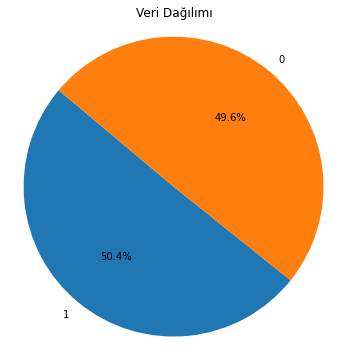

In [27]:
# Etiketlerin ve boyutların hazırlanması
labels = etiket.value_counts().index.tolist()  # Etiketler
sizes = etiket.value_counts().values.tolist()  # Veri boyutları

# Pasta grafiği çizimi
plt.figure(figsize=(6, 6))  # Grafiğin boyutunu ayarla
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Eşit ölçekli daire şeklinde görüntüleme
plt.title('Veri Dağılımı')  # Grafik başlığı ekle
plt.show()  # Grafiği göster

Yukarıdaki grafik bizim doğru yanlış haberleri gösteren pie yani dilim grafiktir.Bu grafikten hareketle veri setimizdeki verilerin çoğunun doğru haber olduğu sonucuna vardık.Yukarıdaki kodları açıklayacak olursak plt.figure ile grafiğin boyutunu ayarladık,plt.axis ile daire dilim grafiğini eşit ölçek daire şeklinde çizdik.plt.title ile başlık ayarladık ve plt.show ile grafiği siz değerli hocamıza gösterdik.

In [28]:
yeni_temiz['mix'] = yeni_temiz['title'].map(str) + " " + yeni_temiz['text']
yeni_temiz = yeni_temiz[['title','text','mix','label']]
yeni_temiz.head()

,title,text,mix,label
0,smell hillary fear,daniel greenfield shillman journalism fellow ...,smell hillary fear daniel greenfield shillma...,0
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,watch exact moment paul ryan committed politic...,0
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,kerry go paris gesture sympathy us secretary s...,1
3,bernie supporters twitter erupt anger dnc we ...,kaydee king kaydeeking november lesson ...,bernie supporters twitter erupt anger dnc we ...,0
4,battle new york primary matters,s primary day new york frontrunners hillary cl...,battle new york primary matters s primary day...,1


In [29]:
karisim=yeni_temiz['mix']

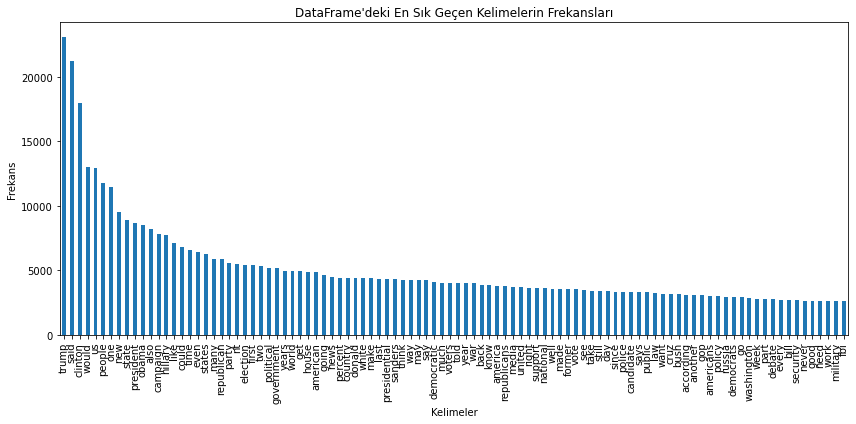

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


# CountVectorizer kullanarak kelime frekanslarını hesapla
vectorizer = CountVectorizer()
kelime_matrisi = vectorizer.fit_transform(karisim)

# Kelime frekanslarını DataFrame'e dönüştürme
kelime_sayilari = pd.DataFrame(kelime_matrisi.toarray(), columns=vectorizer.get_feature_names_out())

# En sık geçen kelimeler ve frekansları
en_sik_kelimeler = kelime_sayilari.sum().sort_values(ascending=False).head(100)

# Bar grafiği oluşturma
plt.figure(figsize=(12, 6))
en_sik_kelimeler.plot(kind='bar')
plt.xlabel('Kelimeler')
plt.ylabel('Frekans')
plt.title('DataFrame\'deki En Sık Geçen Kelimelerin Frekansları')
plt.xticks(rotation=90)  # X eksenindeki metinleri 45 derece döndür
plt.tight_layout()

# Grafiği göster
plt.show()



 

   Grafiğimizde en sık tekrar eden 100 kelimeye ve bunların tekrar sıklıkları yani frekanslarına yer verdik.Bu frekansları bar grafik ile daha
   görsel bir hale getirdik.x eksenini kelimeler ve y ekesenini frekans olarak adlandırdık.

   count vektorizer sınıfı ile kelime frekanslarını hesapladık.Ayrıca tabiki bunu count vektorizer sınıfındaki fit_transform metodunu kullanarak yaptık.

   kelime frekanslarını pandas kutuphanesindeki dataframe sınıfı sayesinde dataframe'e dönüştürdük.

   daha sonra pyplotlib ile bar grafiğinde yukarıda anlattığım özelliklere sahip olacak şekilde grafikasyon işlemlerini tamamladık.

   



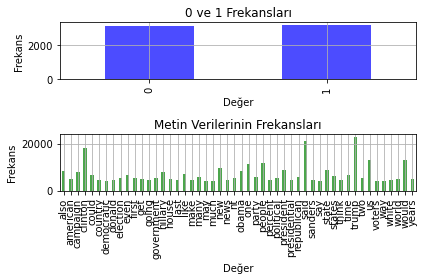

In [31]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

vectorizer2 = CountVectorizer()
kelime_matrisi2 = vectorizer2.fit_transform(karisim)

# Kelime frekanslarını DataFrame'e dönüştürme
kelime_sayilari2 = pd.DataFrame(kelime_matrisi2.toarray(), columns=vectorizer2.get_feature_names_out())
en_çok_kelimeler = kelime_sayilari2.sum().sort_values(ascending=False).head(50)



# 0 ve 1'lerin frekanslarını gösteren bar grafiği
plt.subplot(2, 1, 1)
etiket.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title('0 ve 1 Frekansları')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.grid(True)

# Metin verilerinin frekanslarını gösteren bar grafiği
plt.subplot(2, 1, 2)
en_çok_kelimeler.sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('Metin Verilerinin Frekansları')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.grid(True)

# Grafikleri göster
plt.tight_layout()
plt.show()



Yukarıda oluşturmuş olduğumuz veri setimizde sıklığına göre en çok kullanılan 100 kelimenin bar grafiği bulunmaktaydı.Bizde buna ek olarak 0 ve 1'lerin sıklığını gösteren bar grafiği ekleyip ikisini tek görselde birleştirdik.

In [32]:
yeni_temiz['mix2'] = yeni_temiz['mix'].apply(lambda x : len(x.split()))
print(yeni_temiz['mix2'].describe())

count     6297.000000
mean       441.072733
std        459.124309
min          6.000000
25%        173.000000
50%        349.000000
75%        577.000000
max      10241.000000
Name: mix2, dtype: float64


C:\Users\Monster\AppData\Local\Temp\ipykernel_39180\2923987927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeni_temiz['mix2'] = yeni_temiz['mix'].apply(lambda x : len(x.split()))


In [33]:

X = yeni_temiz.mix
y = yeni_temiz.label

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


MultinomialNB : Naive Bayes algoritmasının bir türdür. Çoknominal(çok sınıflı)  veri setleri sınıflandırma yapmak için kullanılır.

Naive Bayes algoritması genellikle sınıflandırma problemlerinde kullanılır,  bayes teorisine dayanır. Özellikle metin sınıflandırma gibi problemlerde
etkilidir. 

In [34]:
nb = Pipeline([('vector',TfidfVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('clf',MultinomialNB()),
               ])
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
tags = ["FAKE","REAL"]
print("MultinomialNB için doğruluk : %.2f" % accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb,target_names=tags))

MultinomialNB için doğruluk : 0.84
              precision    recall  f1-score   support

        FAKE       0.98      0.68      0.80       935
        REAL       0.76      0.99      0.86       955

    accuracy                           0.84      1890
   macro avg       0.87      0.83      0.83      1890
weighted avg       0.87      0.84      0.83      1890



Pipline kodu sklearn'deki işlem adımlarını bir araya getirir. Bu işlemler "TfidfVectorizer-TfidfTransformer-SGDClassifier" dir. 

TfidfVectorizer  : birinci adım olan TfidfVectorizer metin verilerine TF-IDF metodunu uygular

TfidfTransformer : TF-IDF metodu ile oluşan değerleri ölçeklendirir

SGDClassifier    : Sınıflandırma modelini tanımlanır loss-alpha-random_state-max_iter-tol gibi parametreler alır

sgd.fit ile model eğitilir. X_train eğitim verileri, y_train ise eğitim etiketlerini temsil eder.

sgd.predict ile eğitilen model test verileri üzerinde tahminde bulunur.

accuracy_score'la gereçek veriler ile tahmin edilen veriler arasındaki doğruluk yüzdesini hesaplar.

classification_report ise sınıflandırma raporu oluşturulur. Oluşturuluan bu raporda precision, recall, f1-score ve support metriklerini içerir.

precision : Gerçeklik yüzdesi , tahmin edilen verilerin gerçekte ne kadar doğru olduğunun bilgisini verir.

recall    : Gerçek pozitiflerin tüm gerçek pozitiflere oranını gösterir. 1'e ne kadar yakınsa o kadar iyidir.

f1-score  : precision ile recall değerlerinin harmonik ortalamasıdır. Formül bu şekildedir -> 2*(precision*recall/precision+recall) 

support   : Her bir sınıfın gerçek veri setinde kaç örneğe sahip olduğunu gösterir

macro avg : Her bir sınıfın ağırlıksız ortalamasını temsil eder. Yani hesaplanan precision, recall ve f1-score değerlerinin ortalamasıdır.

In [35]:
sgd = Pipeline([('vector',TfidfVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('clf', SGDClassifier(loss='log',alpha=1e-3,random_state=42,max_iter=5,tol=None)),
                ])
sgd.fit(X_train,y_train)

y_pred_sgd = sgd.predict(X_test)
print('SGD için doğruluk : %.2f' % accuracy_score(y_test,y_pred_sgd))
print()
print(classification_report(y_test,y_pred_sgd,target_names=tags))

SGD için doğruluk : 0.88

              precision    recall  f1-score   support

        FAKE       0.84      0.94      0.88       935
        REAL       0.93      0.82      0.87       955

    accuracy                           0.88      1890
   macro avg       0.88      0.88      0.88      1890
weighted avg       0.88      0.88      0.88      1890



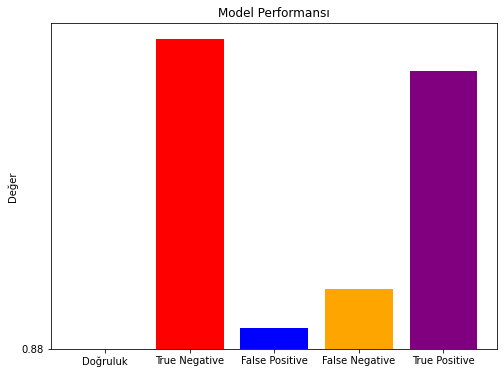

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Önceden tahmin edilmiş sonuçlar ve gerçek etiketler arasındaki karşılaştırma
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
accuracy = '%.2f' % accuracy_score(y_test,y_pred_sgd)

# Doğruluk oranı ve karışıklık matrisini gösteren bir çubuk grafiği
fig, ax = plt.subplots(figsize=(8, 6))

# Doğruluk oranını gösteren çubuk
ax.bar("Doğruluk", accuracy, color='green')

# Karışıklık matrisini gösteren çubuklar
ax.bar("True Negative", conf_matrix[0, 0], color='red')
ax.bar("False Positive", conf_matrix[0, 1], color='blue')
ax.bar("False Negative", conf_matrix[1, 0], color='orange')
ax.bar("True Positive", conf_matrix[1, 1], color='purple')

plt.title('Model Performansı')
plt.ylabel('Değer')
plt.show()

Önemli Kavramlar:

    confusion_matrix: Bu, sınıflandırma modelinin performansını değerlendirmek için kullanılan bir karışıklık matrisini hesaplar. y_test gerçek etiketleri, y_pred_sgd ise modelin önceden tahmin ettiği sonuçları içerir.

    accuracy_score: Bu, doğruluk oranını hesaplar. Doğruluk oranı, doğru tahmin edilen örneklerin toplam örnek sayısına oranını ifade eder.

    plt.subplots: Bu, bir alt grafik (subplot) oluşturur. Çubuk grafiğin boyutları (8x6) belirlenmiştir.

    ax.bar: Bu, çubukları oluşturur. Yeşil çubuk doğruluk oranını temsil ederken, diğer renkli çubuklar karışıklık matrisinin elemanlarını temsil eder. Her bir çubuk, karışıklık matrisinin bir elemanını belirtir.

    plt.title, plt.ylabel: Bu, grafik başlığı ve y-ekseni etiketini belirler.

    plt.show(): Bu, oluşturulan çubuk grafiğini görüntüler.

Özetle, bu grafik, sınıflandırma modelinin performansını değerlendirmek için kullanılan temel metrikleri görselleştirmektedir. Yeşil çubuk doğruluk oranını, diğer renkli çubuklar ise karışıklık matrisinin elemanlarını temsil etmektedir.

In [36]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np

# b=yeni_temiz['title']
# b.dropna(inplace=True)


# # tfidf_vector = TfidfVectorizer(min_df = 0., max_df = 1., use_idf = True)
# # tfidf_matris = tfidf_vector.fit_transform(b)
# # tfidf_matris = tfidf_matris.toarray()
# # tfidf_matris = pd.DataFrame(tfidf_matris)
# # tfidf_matris

# # TfidfVectorizer'ı kullanarak TF-IDF vektörlerini oluşturma
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(b)

# # TF-IDF matrisini DataFrame'e dönüştürme (opsiyonel)
# tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# tfidf_df

# # from sklearn.feature_extraction.text import TfidfVectorizer
# # import scipy.sparse as sp
# # import dask.dataframe as dd

# # # TfidfVectorizer'ı kullanarak TF-IDF vektörlerini oluşturma
# # vectorizer = TfidfVectorizer()
# # X = vectorizer.fit_transform(a)

# # # csr_matrix tipindeki matrisi dask DataFrame'e dönüştürme
# # dask_csr = sp.csr_matrix(X)

# # # Dask DataFrame oluşturma (opsiyonel)
# # dask_df = dd.from_dask_array(dask_csr)

# # # Dask DataFrame'in compute() metodu ile işlemleri gerçekleştirme (örneğin, yazdırma)
# # computed_df = dask_df.compute()

# # print(computed_df)

# # from sklearn.feature_extraction.text import TfidfVectorizer
# # import pandas as pd

# # Örnek büyük DataFrame
# # büyük_df = ...

# # TfidfVectorizer kullanarak TF-IDF vektörlerini oluşturma
# # vectorizer = TfidfVectorizer()
# # X = vectorizer.fit_transform(a)

# # # TF-IDF matrisini pandas DataFrame olarak alabilirisiniz
# # tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# # tfidf_df

# # İşlemleri gerçekleştirme
# # ...
# # import dask.dataframe as dd
# # from sklearn.feature_extraction.text import TfidfVectorizer

# # # Dask DataFrame oluşturma
# # # büyük_df = ...

# # # Dask DataFrame üzerinde TF-IDF vektörlerini hesaplama
# # vectorizer = TfidfVectorizer()
# # X = vectorizer.fit_transform(a)

# # # Hesaplama sonucunu kullanma
# # computed_result = X.compute()

# # from sklearn.feature_extraction.text import TfidfVectorizer
# # import scipy.sparse as sp
# # import dask.dataframe as dd
# # import dask.array as da



# # # TfidfVectorizer kullanarak TF-IDF vektörlerini oluşturma
# # vectorizer = TfidfVectorizer()
# # X = vectorizer.fit_transform(a)

# # # csr_matrix tipindeki matrisi dask.array'e dönüştürme
# # dask_array = da.from_array(X)

# # # Dask DataFrame oluşturma
# # dask_df = dd.from_dask_array(dask_array)

# # # Dask DataFrame'in compute() metodu ile işlemleri gerçekleştirme (örneğin, yazdırma)
# # computed_df = dask_df.compute()

# # print(computed_df)




In [37]:
# label_title = pd.concat([tfidf_df,label2],axis=1)

# label_title.dropna(inplace=True)
# son_data = label_title.iloc[:, :-1]

# yazi_label = label_title['label'] 


In [38]:
# c=yeni_temiz['text']
# c.dropna(inplace=True)


# # TfidfVectorizer'ı kullanarak TF-IDF vektörlerini oluşturma
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(c)

# # TF-IDF matrisini DataFrame'e dönüştürme (opsiyonel)
# tfidf_df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# tfidf_df2

In [39]:
# concat2 = pd.concat([tfidf_df,tfidf_df2],axis=1)

In [40]:
# concat3 = pd.concat([concat2,label3],axis=1)

In [41]:
# concat3.dropna(inplace=True)

In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score


# # Veriyi eğitim ve test setlerine bölmek
# X_train, X_test, y_train, y_test = train_test_split(son_data,yazi_label, test_size=0.2, random_state=42)

# # Sınıflandırıcı modelini oluşturma ve eğitme
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Test seti üzerinde modelin performansını değerlendirme
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test seti doğruluk orani: {accuracy:.2f}")


In [43]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Örnek veri setini oluşturma
# data = {
#     'feature1': [1, 2, 3, 4, 5],
#     'feature2': [2, 3, 4, 5, 6],
#     'label': ['A', 'B', 'A', 'B', 'A']
# }

# # Veri setini DataFrame'e dönüştürme
# df = pd.DataFrame(data)

# # Bağımsız değişkenler ve hedef değişkeni ayırma
# X = df[['feature1', 'feature2']]
# y = df['label']

# # Veriyi eğitim ve test setlerine bölmek
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Sınıflandırıcı modelini oluşturma ve eğitme
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Test seti üzerinde modelin performansını değerlendirme
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test seti doğruluk oranı: {accuracy:.2f}")

